# **Comprehensive Exploratory Data Analysis:** Climate Change Dataset for Policy Insights
# **Executive Summary**
I conducted a comprehensive 10-point exploratory data analysis (EDA) on the climate change dataset for the Deep Data Hackathon, analyzing 1,000 records across 15 countries spanning 2000-2023. The analysis reveals critical insights for evidence-based climate policy development, identifying urgent priorities and strategic opportunities for international environmental action.

## CLIMATE CHANGE DATASET - INITIAL EXPLORATION

In [21]:
# Load the climate change dataset and perform initial data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('climate_change_dataset.csv')


In [22]:
# Display basic information about the dataset

print("\n1. DATASET SHAPE AND BASIC INFO:")
print(f"Dataset shape: {df.shape}")
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


1. DATASET SHAPE AND BASIC INFO:
Dataset shape: (1000, 10)
Rows: 1000, Columns: 10


In [23]:
print("\n2. COLUMN NAMES:")
print(df.columns.tolist())


2. COLUMN NAMES:
['Year', 'Country', 'Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Sea Level Rise (mm)', 'Rainfall (mm)', 'Population', 'Renewable Energy (%)', 'Extreme Weather Events', 'Forest Area (%)']


In [24]:
print("\n3. DATA TYPES:")
print(df.dtypes)


3. DATA TYPES:
Year                             int64
Country                         object
Avg Temperature (°C)           float64
CO2 Emissions (Tons/Capita)    float64
Sea Level Rise (mm)            float64
Rainfall (mm)                    int64
Population                       int64
Renewable Energy (%)           float64
Extreme Weather Events           int64
Forest Area (%)                float64
dtype: object


In [25]:
print("\n4. FIRST 5 ROWS:")
print(df.head())


4. FIRST 5 ROWS:
   Year    Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0  2006         UK                   8.9                          9.3   
1  2019        USA                  31.0                          4.8   
2  2014     France                  33.9                          2.8   
3  2010  Argentina                   5.9                          1.8   
4  2007    Germany                  26.9                          5.6   

   Sea Level Rise (mm)  Rainfall (mm)  Population  Renewable Energy (%)  \
0                  3.1           1441   530911230                  20.4   
1                  4.2           2407   107364344                  49.2   
2                  2.2           1241   441101758                  33.3   
3                  3.2           1892  1069669579                  23.7   
4                  2.4           1743   124079175                  12.5   

   Extreme Weather Events  Forest Area (%)  
0                      14             59.8  
1 

In [26]:
print("\n5. BASIC STATISTICS:")
print(df.describe())


5. BASIC STATISTICS:
              Year  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
count  1000.000000           1000.000000                  1000.000000   
mean   2011.432000             19.883100                    10.425800   
std       7.147199              8.542897                     5.614665   
min    2000.000000              5.000000                     0.500000   
25%    2005.000000             12.175000                     5.575000   
50%    2012.000000             20.100000                    10.700000   
75%    2018.000000             27.225000                    15.400000   
max    2023.000000             34.900000                    20.000000   

       Sea Level Rise (mm)  Rainfall (mm)    Population  Renewable Energy (%)  \
count          1000.000000    1000.000000  1.000000e+03           1000.000000   
mean              3.009600    1738.761000  7.053830e+08             27.300500   
std               1.146081     708.976616  4.093910e+08             12.970808

# EDA 1: Data Quality Assessment - Missing Values and Data Issues

In [27]:
print("\n1. MISSING VALUES:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df)


1. MISSING VALUES:
                             Missing Count  Percentage
Year                                     0         0.0
Country                                  0         0.0
Avg Temperature (°C)                     0         0.0
CO2 Emissions (Tons/Capita)              0         0.0
Sea Level Rise (mm)                      0         0.0
Rainfall (mm)                            0         0.0
Population                               0         0.0
Renewable Energy (%)                     0         0.0
Extreme Weather Events                   0         0.0
Forest Area (%)                          0         0.0


In [28]:
print("\n2. DUPLICATE ROWS:")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


2. DUPLICATE ROWS:
Number of duplicate rows: 0


In [29]:
print("\n3. UNIQUE VALUES PER COLUMN:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


3. UNIQUE VALUES PER COLUMN:
Year: 24 unique values
Country: 15 unique values
Avg Temperature (°C): 292 unique values
CO2 Emissions (Tons/Capita): 194 unique values
Sea Level Rise (mm): 41 unique values
Rainfall (mm): 799 unique values
Population: 1000 unique values
Renewable Energy (%): 407 unique values
Extreme Weather Events: 15 unique values
Forest Area (%): 473 unique values


In [30]:
print("\n4. COUNTRIES IN DATASET:")
unique_countries = df['Country'].unique()
print(f"Total countries: {len(unique_countries)}")
print(f"Countries: {sorted(unique_countries)}")



4. COUNTRIES IN DATASET:
Total countries: 15
Countries: ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Japan', 'Mexico', 'Russia', 'South Africa', 'UK', 'USA']


In [31]:
print("\n5. YEAR RANGE:")
print(f"Year range: {df['Year'].min()} - {df['Year'].max()}")
print(f"Years covered: {sorted(df['Year'].unique())}")


5. YEAR RANGE:
Year range: 2000 - 2023
Years covered: [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [32]:
# Save the basic info to a summary
basic_summary = {
    'total_records': len(df),
    'countries': len(unique_countries),
    'year_range': f"{df['Year'].min()}-{df['Year'].max()}",
    'missing_data': missing_values.sum() == 0
}

In [33]:
print(f"\n6. DATASET SUMMARY:")
for key, value in basic_summary.items():
    print(f"{key.replace('_', ' ').title()}: {value}")



6. DATASET SUMMARY:
Total Records: 1000
Countries: 15
Year Range: 2000-2023
Missing Data: True


# EDA 2: Global Temperature Trends Analysis

In [34]:
# Calculate yearly global temperature averages
yearly_temp = df.groupby('Year')['Avg Temperature (°C)'].agg(['mean', 'median', 'std']).round(2)
print("\n1. YEARLY GLOBAL TEMPERATURE STATISTICS:")
print(yearly_temp)



1. YEARLY GLOBAL TEMPERATURE STATISTICS:
       mean  median   std
Year                     
2000  20.50   20.00  8.20
2001  20.12   21.20  8.64
2002  21.43   21.70  8.10
2003  18.22   18.90  9.09
2004  18.80   17.10  8.71
2005  19.53   19.30  9.90
2006  19.81   21.40  8.49
2007  20.56   20.90  8.85
2008  19.14   19.30  8.09
2009  19.73   18.90  8.97
2010  17.96   16.30  8.58
2011  18.86   20.30  8.04
2012  17.57   17.85  7.91
2013  18.83   20.20  8.00
2014  20.83   21.80  9.35
2015  19.92   20.40  8.60
2016  21.16   21.20  9.05
2017  19.48   19.35  8.81
2018  23.25   24.45  8.24
2019  20.40   21.40  7.82
2020  19.04   19.10  8.56
2021  20.08   21.15  8.53
2022  18.96   17.60  8.30
2023  21.11   22.45  8.22


In [35]:
# Temperature trend analysis
from scipy import stats
years = yearly_temp.index
temps = yearly_temp['mean']
slope, intercept, r_value, p_value, std_err = stats.linregress(years, temps)

print(f"\n2. TEMPERATURE TREND ANALYSIS (2000-2023):")
print(f"Temperature increase rate: {slope:.4f}°C per year")
print(f"Total temperature increase over period: {slope * 23:.2f}°C")
print(f"Correlation coefficient (R): {r_value:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"Statistical significance: {'Yes' if p_value < 0.05 else 'No'}")


2. TEMPERATURE TREND ANALYSIS (2000-2023):
Temperature increase rate: 0.0280°C per year
Total temperature increase over period: 0.64°C
Correlation coefficient (R): 0.1573
R-squared: 0.0248
P-value: 0.462805
Statistical significance: No


In [36]:
# Country-wise temperature analysis
country_temp = df.groupby('Country')['Avg Temperature (°C)'].agg(['mean', 'min', 'max']).round(2)
country_temp['Range'] = (country_temp['max'] - country_temp['min']).round(2)
country_temp = country_temp.sort_values('mean', ascending=False)

print(f"\n3. COUNTRY-WISE AVERAGE TEMPERATURES (Ranked):")
print(country_temp)


3. COUNTRY-WISE AVERAGE TEMPERATURES (Ranked):
               mean  min   max  Range
Country                              
Brazil        20.84  5.0  34.9   29.9
South Africa  20.74  5.0  34.8   29.8
Russia        20.72  5.3  34.2   28.9
Mexico        20.70  5.1  34.5   29.4
Japan         20.45  5.7  34.5   28.8
Germany       20.29  5.1  34.7   29.6
China         20.28  5.4  34.8   29.4
Canada        20.01  5.5  34.2   28.7
India         19.76  5.3  34.9   29.6
Australia     19.45  5.4  34.5   29.1
France        19.38  5.1  34.8   29.7
Argentina     19.30  5.7  34.7   29.0
USA           19.05  5.5  34.6   29.1
Indonesia     18.92  5.5  34.4   28.9
UK            18.49  5.0  33.5   28.5


In [37]:
# Hottest and coldest countries
print(f"\n4. TEMPERATURE EXTREMES:")
print(f"Hottest country (average): {country_temp.index[0]} ({country_temp.iloc[0]['mean']}°C)")
print(f"Coldest country (average): {country_temp.index[-1]} ({country_temp.iloc[-1]['mean']}°C)")
print(f"Highest recorded temperature: {df['Avg Temperature (°C)'].max()}°C")
print(f"Lowest recorded temperature: {df['Avg Temperature (°C)'].min()}°C")



4. TEMPERATURE EXTREMES:
Hottest country (average): Brazil (20.84°C)
Coldest country (average): UK (18.49°C)
Highest recorded temperature: 34.9°C
Lowest recorded temperature: 5.0°C


In [38]:
# Temperature variability
print(f"\n5. TEMPERATURE VARIABILITY:")
print(f"Country with highest temperature range: {country_temp.sort_values('Range', ascending=False).index[0]} ({country_temp.sort_values('Range', ascending=False).iloc[0]['Range']}°C)")


5. TEMPERATURE VARIABILITY:
Country with highest temperature range: Brazil (29.9°C)


# EDA 3: CO2 Emissions Analysis

In [39]:
# Global CO2 emissions trends
yearly_co2 = df.groupby('Year')['CO2 Emissions (Tons/Capita)'].agg(['mean', 'median', 'sum']).round(2)

# CO2 trend analysis
co2_slope, co2_intercept, co2_r, co2_p, co2_err = stats.linregress(yearly_co2.index, yearly_co2['mean'])

print(f"\n1. GLOBAL CO2 EMISSIONS TREND ANALYSIS:")
print(f"CO2 emissions change rate: {co2_slope:.4f} tons/capita per year")
print(f"Total change over period: {co2_slope * 23:.2f} tons/capita")
print(f"Correlation coefficient (R): {co2_r:.4f}")
print(f"Statistical significance: {'Yes' if co2_p < 0.05 else 'No'}")


1. GLOBAL CO2 EMISSIONS TREND ANALYSIS:
CO2 emissions change rate: 0.0317 tons/capita per year
Total change over period: 0.73 tons/capita
Correlation coefficient (R): 0.2459
Statistical significance: No


In [40]:
# Country-wise CO2 emissions
country_co2 = df.groupby('Country')['CO2 Emissions (Tons/Capita)'].agg(['mean', 'min', 'max']).round(2)
country_co2 = country_co2.sort_values('mean', ascending=False)

print(f"\n2. COUNTRY-WISE CO2 EMISSIONS (Highest to Lowest):")
print(country_co2)


2. COUNTRY-WISE CO2 EMISSIONS (Highest to Lowest):
               mean  min   max
Country                       
UK            12.65  0.5  20.0
Indonesia     11.02  0.6  19.8
France        10.97  0.6  19.9
Japan         10.96  1.3  19.9
USA           10.88  0.5  19.8
Brazil        10.84  0.5  20.0
China         10.84  1.1  20.0
India         10.69  0.8  19.9
Argentina     10.45  0.7  19.9
Canada        10.11  0.8  19.4
Germany        9.88  0.5  19.7
South Africa   9.62  0.6  19.8
Mexico         9.35  0.8  19.8
Russia         8.97  0.6  19.4
Australia      8.90  0.8  18.6


In [41]:
# CO2 emissions categories
df['CO2_Category'] = pd.cut(df['CO2 Emissions (Tons/Capita)'], 
                           bins=[0, 5, 10, 15, 20], 
                           labels=['Low (0-5)', 'Medium (5-10)', 'High (10-15)', 'Very High (15-20)'])

co2_categories = df['CO2_Category'].value_counts()
print(f"\n3. CO2 EMISSIONS DISTRIBUTION:")
print(co2_categories)
print(f"Percentage breakdown:")
for cat, count in co2_categories.items():
    print(f"{cat}: {count/len(df)*100:.1f}%")


3. CO2 EMISSIONS DISTRIBUTION:
CO2_Category
High (10-15)         266
Very High (15-20)    262
Medium (5-10)        245
Low (0-5)            227
Name: count, dtype: int64
Percentage breakdown:
High (10-15): 26.6%
Very High (15-20): 26.2%
Medium (5-10): 24.5%
Low (0-5): 22.7%


In [42]:
# Recent trends (2018-2023)
recent_co2 = df[df['Year'] >= 2018].groupby('Country')['CO2 Emissions (Tons/Capita)'].mean().sort_values(ascending=False)
print(f"\n4. RECENT CO2 EMISSIONS (2018-2023 Average):")
print(recent_co2.round(2))

print(f"\n5. CO2 EMISSIONS STATISTICS:")
print(f"Global average: {df['CO2 Emissions (Tons/Capita)'].mean():.2f} tons/capita")
print(f"Median emissions: {df['CO2 Emissions (Tons/Capita)'].median():.2f} tons/capita")
print(f"Standard deviation: {df['CO2 Emissions (Tons/Capita)'].std():.2f} tons/capita")
print(f"Highest emitter: {country_co2.index[0]} ({country_co2.iloc[0]['mean']:.2f} tons/capita)")
print(f"Lowest emitter: {country_co2.index[-1]} ({country_co2.iloc[-1]['mean']:.2f} tons/capita)")


4. RECENT CO2 EMISSIONS (2018-2023 Average):
Country
UK              15.84
Indonesia       12.21
India           11.57
China           11.36
USA             11.30
France          11.13
Argentina       10.92
Germany         10.85
South Africa    10.21
Brazil          10.20
Russia           9.92
Japan            9.84
Australia        9.48
Canada           9.31
Mexico           9.23
Name: CO2 Emissions (Tons/Capita), dtype: float64

5. CO2 EMISSIONS STATISTICS:
Global average: 10.43 tons/capita
Median emissions: 10.70 tons/capita
Standard deviation: 5.61 tons/capita
Highest emitter: UK (12.65 tons/capita)
Lowest emitter: Australia (8.90 tons/capita)


# EDA 4: Renewable Energy Adoption Analysis

In [43]:
# Global renewable energy trends
yearly_renewable = df.groupby('Year')['Renewable Energy (%)'].agg(['mean', 'median']).round(2)

In [44]:
# Renewable energy trend analysis
re_slope, re_intercept, re_r, re_p, re_err = stats.linregress(yearly_renewable.index, yearly_renewable['mean'])

print(f"\n1. GLOBAL RENEWABLE ENERGY TREND ANALYSIS:")
print(f"Renewable energy growth rate: {re_slope:.4f}% per year")
print(f"Total increase over period: {re_slope * 23:.2f}%")
print(f"Correlation coefficient (R): {re_r:.4f}")
print(f"Statistical significance: {'Yes' if re_p < 0.05 else 'No'}")


1. GLOBAL RENEWABLE ENERGY TREND ANALYSIS:
Renewable energy growth rate: 0.0519% per year
Total increase over period: 1.19%
Correlation coefficient (R): 0.2088
Statistical significance: No


In [45]:
# Country-wise renewable energy
country_renewable = df.groupby('Country')['Renewable Energy (%)'].agg(['mean', 'min', 'max']).round(2)
country_renewable = country_renewable.sort_values('mean', ascending=False)

print(f"\n2. COUNTRY-WISE RENEWABLE ENERGY ADOPTION (Highest to Lowest):")
print(country_renewable)



2. COUNTRY-WISE RENEWABLE ENERGY ADOPTION (Highest to Lowest):
               mean  min   max
Country                       
China         29.13  5.4  49.4
Brazil        28.79  6.3  49.1
France        28.74  5.1  50.0
Germany       28.71  5.6  49.5
Russia        28.51  6.0  49.8
UK            27.92  5.9  49.5
India         27.69  5.8  49.9
Japan         27.56  5.4  48.0
Mexico        27.52  5.2  48.9
Argentina     27.26  5.4  50.0
Indonesia     26.53  5.2  49.2
Canada        26.24  5.5  49.4
USA           25.72  5.3  49.6
Australia     25.62  5.9  49.8
South Africa  23.92  5.3  48.5


In [46]:
# Renewable energy categories
df['RE_Category'] = pd.cut(df['Renewable Energy (%)'],
                          bins=[0, 20, 35, 50],
                          labels=['Low (<20%)', 'Medium (20-35%)', 'High (>35%)'])

re_categories = df['RE_Category'].value_counts()
print(f"\n3. RENEWABLE ENERGY DISTRIBUTION:")
print(re_categories)
for cat, count in re_categories.items():
    print(f"{cat}: {count/len(df)*100:.1f}%")


3. RENEWABLE ENERGY DISTRIBUTION:
RE_Category
Medium (20-35%)    343
Low (<20%)         334
High (>35%)        323
Name: count, dtype: int64
Medium (20-35%): 34.3%
Low (<20%): 33.4%
High (>35%): 32.3%


In [47]:
# Leaders and laggards in recent years
recent_renewable = df[df['Year'] >= 2018].groupby('Country')['Renewable Energy (%)'].mean().sort_values(ascending=False)
print(f"\n4. RECENT RENEWABLE ENERGY LEADERS (2018-2023 Average):")
print(recent_renewable.round(2))



4. RECENT RENEWABLE ENERGY LEADERS (2018-2023 Average):
Country
Argentina       33.02
Brazil          31.24
France          29.26
Japan           28.79
Germany         28.19
China           28.08
Russia          27.78
South Africa    27.62
UK              26.93
Indonesia       25.01
Australia       24.69
India           24.67
USA             23.83
Mexico          23.01
Canada          19.38
Name: Renewable Energy (%), dtype: float64


In [48]:
# Growth analysis by country
renewable_growth = df.groupby('Country').apply(
    lambda x: stats.linregress(x['Year'], x['Renewable Energy (%)'])[0]
).sort_values(ascending=False)

print(f"\n5. RENEWABLE ENERGY GROWTH RATES BY COUNTRY:")
print(f"(Annual percentage point increase)")
for country, growth in renewable_growth.items():
    print(f"{country}: {growth:.3f}% per year")

print(f"\n6. RENEWABLE ENERGY STATISTICS:")
print(f"Global average: {df['Renewable Energy (%)'].mean():.2f}%")
print(f"Median adoption: {df['Renewable Energy (%)'].median():.2f}%")
print(f"Standard deviation: {df['Renewable Energy (%)'].std():.2f}%")
print(f"Highest adopter: {country_renewable.index[0]} ({country_renewable.iloc[0]['mean']:.2f}%)")
print(f"Lowest adopter: {country_renewable.index[-1]} ({country_renewable.iloc[-1]['mean']:.2f}%)")


5. RENEWABLE ENERGY GROWTH RATES BY COUNTRY:
(Annual percentage point increase)
Argentina: 0.480% per year
Germany: 0.233% per year
South Africa: 0.113% per year
India: 0.108% per year
France: 0.100% per year
Brazil: 0.088% per year
UK: 0.072% per year
Mexico: 0.066% per year
Russia: 0.048% per year
Australia: -0.001% per year
Japan: -0.004% per year
Indonesia: -0.047% per year
China: -0.147% per year
USA: -0.193% per year
Canada: -0.272% per year

6. RENEWABLE ENERGY STATISTICS:
Global average: 27.30%
Median adoption: 27.15%
Standard deviation: 12.97%
Highest adopter: China (29.13%)
Lowest adopter: South Africa (23.92%)


# EDA 5: Extreme Weather Events Analysis

In [49]:
# Global extreme weather trends
yearly_weather = df.groupby('Year')['Extreme Weather Events'].agg(['mean', 'sum', 'max']).round(2)

In [50]:
# Weather events trend analysis
weather_slope, weather_intercept, weather_r, weather_p, weather_err = stats.linregress(yearly_weather.index, yearly_weather['mean'])

print(f"\n1. GLOBAL EXTREME WEATHER EVENTS TREND ANALYSIS:")
print(f"Weather events change rate: {weather_slope:.4f} events per year")
print(f"Total change over period: {weather_slope * 23:.2f} events")
print(f"Correlation coefficient (R): {weather_r:.4f}")
print(f"Statistical significance: {'Yes' if weather_p < 0.05 else 'No'}")


1. GLOBAL EXTREME WEATHER EVENTS TREND ANALYSIS:
Weather events change rate: -0.0145 events per year
Total change over period: -0.33 events
Correlation coefficient (R): -0.1564
Statistical significance: No


In [51]:
# Country-wise extreme weather events
country_weather = df.groupby('Country')['Extreme Weather Events'].agg(['mean', 'sum', 'max']).round(2)
country_weather = country_weather.sort_values('mean', ascending=False)

print(f"\n2. COUNTRY-WISE EXTREME WEATHER EVENTS (Highest to Lowest):")
print(country_weather)


2. COUNTRY-WISE EXTREME WEATHER EVENTS (Highest to Lowest):
              mean  sum  max
Country                     
France        8.62  569   14
Japan         7.86  495   14
UK            7.78  506   14
India         7.60  532   14
Indonesia     7.53  565   14
Russia        7.49  554   14
China         7.39  495   14
Canada        7.30  489   14
USA           7.16  523   14
South Africa  6.99  510   14
Brazil        6.88  461   14
Germany       6.84  417   14
Australia     6.67  380   14
Argentina     6.58  441   14
Mexico        6.44  354   14


In [52]:
# Weather events categories
df['Weather_Category'] = pd.cut(df['Extreme Weather Events'], 
                               bins=[-1, 3, 8, 14], 
                               labels=['Low (0-3)', 'Medium (4-8)', 'High (9-14)'])

weather_categories = df['Weather_Category'].value_counts()
print(f"\n3. EXTREME WEATHER EVENTS DISTRIBUTION:")
print(weather_categories)
for cat, count in weather_categories.items():
    print(f"{cat}: {count/len(df)*100:.1f}%")


3. EXTREME WEATHER EVENTS DISTRIBUTION:
Weather_Category
High (9-14)     434
Medium (4-8)    305
Low (0-3)       261
Name: count, dtype: int64
High (9-14): 43.4%
Medium (4-8): 30.5%
Low (0-3): 26.1%


In [53]:
# Recent extreme weather trends
recent_weather = df[df['Year'] >= 2018].groupby('Country')['Extreme Weather Events'].mean().sort_values(ascending=False)
print(f"\n4. RECENT EXTREME WEATHER EVENTS (2018-2023 Average):")
print(recent_weather.round(2))



4. RECENT EXTREME WEATHER EVENTS (2018-2023 Average):
Country
UK              8.78
India           8.00
France          7.94
China           7.86
Canada          7.82
Mexico          7.71
Indonesia       7.69
Russia          7.69
South Africa    7.31
Australia       7.06
Japan           6.65
USA             6.50
Argentina       6.45
Brazil          6.20
Germany         5.27
Name: Extreme Weather Events, dtype: float64


In [54]:
# Countries with increasing weather events
weather_growth = df.groupby('Country').apply(
    lambda x: stats.linregress(x['Year'], x['Extreme Weather Events'])[0]
).sort_values(ascending=False)

print(f"\n5. EXTREME WEATHER EVENTS GROWTH RATES BY COUNTRY:")
print(f"(Annual change in number of events)")
for country, growth in weather_growth.items():
    trend = "Increasing" if growth > 0 else "Decreasing" if growth < 0 else "Stable"
    print(f"{country}: {growth:.3f} events/year ({trend})")



5. EXTREME WEATHER EVENTS GROWTH RATES BY COUNTRY:
(Annual change in number of events)
China: 0.064 events/year (Increasing)
India: 0.060 events/year (Increasing)
Russia: 0.038 events/year (Increasing)
Indonesia: 0.020 events/year (Increasing)
UK: 0.016 events/year (Increasing)
Australia: 0.001 events/year (Increasing)
South Africa: -0.008 events/year (Decreasing)
Mexico: -0.013 events/year (Decreasing)
Argentina: -0.043 events/year (Decreasing)
Canada: -0.049 events/year (Decreasing)
Germany: -0.052 events/year (Decreasing)
France: -0.061 events/year (Decreasing)
Japan: -0.063 events/year (Decreasing)
Brazil: -0.072 events/year (Decreasing)
USA: -0.079 events/year (Decreasing)


In [55]:
# Correlation analysis
temp_weather_corr = df['Avg Temperature (°C)'].corr(df['Extreme Weather Events'])
print(f"\n6. EXTREME WEATHER STATISTICS:")
print(f"Global average: {df['Extreme Weather Events'].mean():.2f} events per year")
print(f"Maximum events in a year: {df['Extreme Weather Events'].max()}")
print(f"Correlation with temperature: {temp_weather_corr:.4f}")
print(f"Most affected country: {country_weather.index[0]} ({country_weather.iloc[0]['mean']:.2f} events/year)")
print(f"Least affected country: {country_weather.index[-1]} ({country_weather.iloc[-1]['mean']:.2f} events/year)")


6. EXTREME WEATHER STATISTICS:
Global average: 7.29 events per year
Maximum events in a year: 14
Correlation with temperature: 0.0350
Most affected country: France (8.62 events/year)
Least affected country: Mexico (6.44 events/year)


# EDA 6: Sea Level Rise Analysis

In [56]:
# Global sea level rise trends
yearly_sea_level = df.groupby('Year')['Sea Level Rise (mm)'].agg(['mean', 'median', 'max']).round(2)                               

In [57]:
# Sea level trend analysis
sea_slope, sea_intercept, sea_r, sea_p, sea_err = stats.linregress(yearly_sea_level.index, yearly_sea_level['mean'])

print(f"\n1. GLOBAL SEA LEVEL RISE TREND ANALYSIS:")
print(f"Sea level rise rate: {sea_slope:.4f} mm per year")
print(f"Total rise over period: {sea_slope * 23:.2f} mm")
print(f"Correlation coefficient (R): {sea_r:.4f}")
print(f"Statistical significance: {'Yes' if sea_p < 0.05 else 'No'}")


1. GLOBAL SEA LEVEL RISE TREND ANALYSIS:
Sea level rise rate: 0.0055 mm per year
Total rise over period: 0.13 mm
Correlation coefficient (R): 0.2847
Statistical significance: No


In [58]:
# Country-wise sea level rise
country_sea_level = df.groupby('Country')['Sea Level Rise (mm)'].agg(['mean', 'min', 'max']).round(2)
country_sea_level = country_sea_level.sort_values('mean', ascending=False)

print(f"\n2. COUNTRY-WISE SEA LEVEL RISE (Highest to Lowest):")
print(country_sea_level)


2. COUNTRY-WISE SEA LEVEL RISE (Highest to Lowest):
              mean  min  max
Country                     
Russia        3.29  1.0  5.0
France        3.19  1.0  4.9
Argentina     3.17  1.0  5.0
Brazil        3.17  1.0  5.0
Australia     3.16  1.1  5.0
Canada        3.14  1.2  5.0
Japan         3.08  1.1  5.0
UK            2.96  1.0  5.0
China         2.93  1.0  4.9
USA           2.93  1.1  4.9
India         2.90  1.0  5.0
South Africa  2.89  1.2  5.0
Germany       2.87  1.1  5.0
Indonesia     2.75  1.1  5.0
Mexico        2.69  1.0  4.7


In [59]:
# Sea level rise categories
df['Sea_Level_Category'] = pd.cut(df['Sea Level Rise (mm)'],
                                 bins=[0, 2, 3.5, 5],
                                 labels=['Low (1-2mm)', 'Medium (2-3.5mm)', 'High (3.5-5mm)'])

sea_categories = df['Sea_Level_Category'].value_counts()
print(f"\n3. SEA LEVEL RISE DISTRIBUTION:")
print(sea_categories)
for cat, count in sea_categories.items():
    print(f"{cat}: {count/len(df)*100:.1f}%")



3. SEA LEVEL RISE DISTRIBUTION:
Sea_Level_Category
Medium (2-3.5mm)    377
High (3.5-5mm)      368
Low (1-2mm)         255
Name: count, dtype: int64
Medium (2-3.5mm): 37.7%
High (3.5-5mm): 36.8%
Low (1-2mm): 25.5%


In [60]:
# Recent sea level trends
recent_sea_level = df[df['Year'] >= 2018].groupby('Country')['Sea Level Rise (mm)'].mean().sort_values(ascending=False)
print(f"\n4. RECENT SEA LEVEL RISE (2018-2023 Average):")
print(recent_sea_level.round(2))



4. RECENT SEA LEVEL RISE (2018-2023 Average):
Country
France          3.66
Russia          3.46
Argentina       3.42
Australia       3.21
Canada          3.20
USA             3.13
China           3.10
Mexico          3.06
UK              3.03
Brazil          3.00
Indonesia       2.99
Japan           2.97
South Africa    2.92
Germany         2.61
India           2.58
Name: Sea Level Rise (mm), dtype: float64


In [61]:
# Sea level rise acceleration analysis
sea_level_growth = df.groupby('Country').apply(
    lambda x: stats.linregress(x['Year'], x['Sea Level Rise (mm)'])[0]
).sort_values(ascending=False)

print(f"\n5. SEA LEVEL RISE ACCELERATION BY COUNTRY:")
print(f"(Annual change in mm per year)")
for country, growth in sea_level_growth.items():
    trend = "Accelerating" if growth > 0 else "Decelerating" if growth < 0 else "Stable"
    print(f"{country}: {growth:.4f} mm/year² ({trend})")



5. SEA LEVEL RISE ACCELERATION BY COUNTRY:
(Annual change in mm per year)
Mexico: 0.0392 mm/year² (Accelerating)
France: 0.0317 mm/year² (Accelerating)
Argentina: 0.0308 mm/year² (Accelerating)
China: 0.0273 mm/year² (Accelerating)
Australia: 0.0241 mm/year² (Accelerating)
USA: 0.0224 mm/year² (Accelerating)
Canada: 0.0069 mm/year² (Accelerating)
South Africa: -0.0003 mm/year² (Decelerating)
Indonesia: -0.0035 mm/year² (Decelerating)
Japan: -0.0070 mm/year² (Decelerating)
UK: -0.0078 mm/year² (Decelerating)
Russia: -0.0104 mm/year² (Decelerating)
Brazil: -0.0159 mm/year² (Decelerating)
Germany: -0.0230 mm/year² (Decelerating)
India: -0.0288 mm/year² (Decelerating)


In [62]:
# Correlation with temperature
temp_sea_corr = df['Avg Temperature (°C)'].corr(df['Sea Level Rise (mm)'])

print(f"\n6. SEA LEVEL RISE STATISTICS:")
print(f"Global average: {df['Sea Level Rise (mm)'].mean():.2f} mm/year")
print(f"Maximum rise recorded: {df['Sea Level Rise (mm)'].max():.1f} mm")
print(f"Minimum rise recorded: {df['Sea Level Rise (mm)'].min():.1f} mm")
print(f"Correlation with temperature: {temp_sea_corr:.4f}")
print(f"Highest rise country: {country_sea_level.index[0]} ({country_sea_level.iloc[0]['mean']:.2f} mm/year)")
print(f"Lowest rise country: {country_sea_level.index[-1]} ({country_sea_level.iloc[-1]['mean']:.2f} mm/year)")


6. SEA LEVEL RISE STATISTICS:
Global average: 3.01 mm/year
Maximum rise recorded: 5.0 mm
Minimum rise recorded: 1.0 mm
Correlation with temperature: 0.0590
Highest rise country: Russia (3.29 mm/year)
Lowest rise country: Mexico (2.69 mm/year)


# EDA 7: Forest Cover and Deforestation Analysis

In [63]:
# Global forest cover trends
yearly_forest = df.groupby('Year')['Forest Area (%)'].agg(['mean', 'median']).round(2)

In [64]:
# Forest trend analysis
forest_slope, forest_intercept, forest_r, forest_p, forest_err = stats.linregress(yearly_forest.index, yearly_forest['mean'])

print(f"\n1. GLOBAL FOREST COVER TREND ANALYSIS:")
print(f"Forest cover change rate: {forest_slope:.4f}% per year")
print(f"Total change over period: {forest_slope * 23:.2f}%")
if forest_slope < 0:
    print(f"Status: Deforestation occurring globally")
else:
    print(f"Status: Forest cover increasing globally")
print(f"Correlation coefficient (R): {forest_r:.4f}")
print(f"Statistical significance: {'Yes' if forest_p < 0.05 else 'No'}")


1. GLOBAL FOREST COVER TREND ANALYSIS:
Forest cover change rate: -0.1005% per year
Total change over period: -2.31%
Status: Deforestation occurring globally
Correlation coefficient (R): -0.3152
Statistical significance: No


In [65]:
# Country-wise forest cover
country_forest = df.groupby('Country')['Forest Area (%)'].agg(['mean', 'min', 'max']).round(2)
country_forest = country_forest.sort_values('mean', ascending=False)

print(f"\n2. COUNTRY-WISE FOREST COVER (Highest to Lowest):")
print(country_forest)


2. COUNTRY-WISE FOREST COVER (Highest to Lowest):
               mean   min   max
Country                        
China         44.30  11.2  69.9
Mexico        43.38  12.0  69.5
UK            42.72  11.2  69.9
Germany       42.60  10.5  69.2
Canada        41.93  11.7  69.5
South Africa  41.07  11.1  69.4
Australia     40.85  10.9  68.3
Indonesia     40.52  10.3  69.6
Brazil        39.77  12.1  69.1
France        39.50  11.1  69.0
India         38.99  10.1  68.1
Argentina     38.83  10.3  68.6
USA           38.53  10.8  70.0
Russia        38.51  10.4  67.7
Japan         38.12  10.3  69.5


In [66]:
# Forest cover categories
df['Forest_Category'] = pd.cut(df['Forest Area (%)'],
                              bins=[0, 30, 50, 70],
                              labels=['Low (<30%)', 'Medium (30-50%)', 'High (>50%)'])

forest_categories = df['Forest_Category'].value_counts()
print(f"\n3. FOREST COVER DISTRIBUTION:")
print(forest_categories)
for cat, count in forest_categories.items():
    print(f"{cat}: {count/len(df)*100:.1f}%")



3. FOREST COVER DISTRIBUTION:
Forest_Category
High (>50%)        367
Low (<30%)         330
Medium (30-50%)    303
Name: count, dtype: int64
High (>50%): 36.7%
Low (<30%): 33.0%
Medium (30-50%): 30.3%


In [67]:
# Recent forest cover
recent_forest = df[df['Year'] >= 2018].groupby('Country')['Forest Area (%)'].mean().sort_values(ascending=False)
print(f"\n4. RECENT FOREST COVER (2018-2023 Average):")
print(recent_forest.round(2))



4. RECENT FOREST COVER (2018-2023 Average):
Country
China           48.37
UK              44.63
Brazil          42.84
Japan           42.16
India           41.67
Argentina       40.93
Australia       39.89
Germany         39.57
Russia          38.93
South Africa    38.91
USA             38.35
Mexico          37.22
Indonesia       37.14
France          35.35
Canada          34.34
Name: Forest Area (%), dtype: float64


In [68]:
# Deforestation/reforestation rates
forest_growth = df.groupby('Country').apply(
    lambda x: stats.linregress(x['Year'], x['Forest Area (%)'])[0]
).sort_values(ascending=False)

print(f"\n5. FOREST COVER CHANGE RATES BY COUNTRY:")
print(f"(Annual percentage change)")
for country, growth in forest_growth.items():
    if growth > 0:
        status = "Reforestation"
    elif growth < 0:
        status = "Deforestation"
    else:
        status = "Stable"
    print(f"{country}: {growth:.3f}%/year ({status})")


5. FOREST COVER CHANGE RATES BY COUNTRY:
(Annual percentage change)
China: 0.413%/year (Reforestation)
Brazil: 0.347%/year (Reforestation)
Argentina: 0.250%/year (Reforestation)
Japan: 0.129%/year (Reforestation)
India: 0.075%/year (Reforestation)
South Africa: -0.019%/year (Deforestation)
UK: -0.021%/year (Deforestation)
USA: -0.034%/year (Deforestation)
Mexico: -0.114%/year (Deforestation)
Canada: -0.218%/year (Deforestation)
Australia: -0.255%/year (Deforestation)
Germany: -0.335%/year (Deforestation)
Russia: -0.361%/year (Deforestation)
Indonesia: -0.507%/year (Deforestation)
France: -0.734%/year (Deforestation)


In [69]:
# Countries with severe deforestation
deforestation_countries = forest_growth[forest_growth < -0.1].index.tolist()
reforestation_countries = forest_growth[forest_growth > 0.1].index.tolist()

print(f"\n6. FOREST COVER STATISTICS:")
print(f"Global average forest cover: {df['Forest Area (%)'].mean():.2f}%")
print(f"Highest forest cover: {country_forest.index[0]} ({country_forest.iloc[0]['mean']:.2f}%)")
print(f"Lowest forest cover: {country_forest.index[-1]} ({country_forest.iloc[-1]['mean']:.2f}%)")
print(f"Countries with significant deforestation: {len(deforestation_countries)}")
print(f"Countries with significant reforestation: {len(reforestation_countries)}")
if deforestation_countries:
    print(f"Severe deforestation in: {', '.join(deforestation_countries)}")
if reforestation_countries:
    print(f"Active reforestation in: {', '.join(reforestation_countries)}")


6. FOREST COVER STATISTICS:
Global average forest cover: 40.57%
Highest forest cover: China (44.30%)
Lowest forest cover: Japan (38.12%)
Countries with significant deforestation: 7
Countries with significant reforestation: 4
Severe deforestation in: Mexico, Canada, Australia, Germany, Russia, Indonesia, France
Active reforestation in: China, Brazil, Argentina, Japan


# EDA 8: Rainfall Patterns and Water Security Analysis

In [70]:
# Global rainfall trends
yearly_rainfall = df.groupby('Year')['Rainfall (mm)'].agg(['mean', 'median', 'std']).round(2)

In [71]:
# Rainfall trend analysis
rain_slope, rain_intercept, rain_r, rain_p, rain_err = stats.linregress(yearly_rainfall.index, yearly_rainfall['mean'])

print(f"\n1. GLOBAL RAINFALL TREND ANALYSIS:")
print(f"Rainfall change rate: {rain_slope:.4f} mm per year")
print(f"Total change over period: {rain_slope * 23:.2f} mm")
print(f"Correlation coefficient (R): {rain_r:.4f}")
print(f"Statistical significance: {'Yes' if rain_p < 0.05 else 'No'}")


1. GLOBAL RAINFALL TREND ANALYSIS:
Rainfall change rate: -0.7767 mm per year
Total change over period: -17.86 mm
Correlation coefficient (R): -0.0440
Statistical significance: No


In [72]:
# Country-wise rainfall patterns
country_rainfall = df.groupby('Country')['Rainfall (mm)'].agg(['mean', 'min', 'max', 'std']).round(2)
country_rainfall = country_rainfall.sort_values('mean', ascending=False)

print(f"\n2. COUNTRY-WISE RAINFALL PATTERNS (Highest to Lowest):")
print(country_rainfall)



2. COUNTRY-WISE RAINFALL PATTERNS (Highest to Lowest):
                 mean  min   max     std
Country                                 
Canada        1834.40  527  2999  726.58
China         1834.18  577  2915  692.91
Indonesia     1808.16  518  2994  721.58
Mexico        1807.89  528  2991  741.12
Japan         1799.38  540  2995  686.01
Brazil        1795.01  615  2976  679.82
France        1767.98  526  2989  722.65
Germany       1741.48  572  2976  694.19
USA           1734.55  518  2914  738.50
Australia     1720.96  534  2911  721.55
Argentina     1714.34  626  2949  696.90
South Africa  1699.05  501  2997  793.82
Russia        1690.00  555  2891  703.24
India         1617.40  544  2910  670.90
UK            1530.60  534  2960  629.16


In [73]:
# Rainfall categories
df['Rainfall_Category'] = pd.cut(df['Rainfall (mm)'],
                                bins=[0, 1000, 1800, 3000],
                                labels=['Arid (<1000mm)', 'Moderate (1000-1800mm)', 'High (>1800mm)'])

rainfall_categories = df['Rainfall_Category'].value_counts()
print(f"\n3. RAINFALL DISTRIBUTION:")
print(rainfall_categories)
for cat, count in rainfall_categories.items():
    print(f"{cat}: {count/len(df)*100:.1f}%")



3. RAINFALL DISTRIBUTION:
Rainfall_Category
High (>1800mm)            482
Moderate (1000-1800mm)    316
Arid (<1000mm)            202
Name: count, dtype: int64
High (>1800mm): 48.2%
Moderate (1000-1800mm): 31.6%
Arid (<1000mm): 20.2%


In [74]:
# Recent rainfall patterns
recent_rainfall = df[df['Year'] >= 2018].groupby('Country')['Rainfall (mm)'].mean().sort_values(ascending=False)
print(f"\n4. RECENT RAINFALL PATTERNS (2018-2023 Average):")
print(recent_rainfall.round(0))



4. RECENT RAINFALL PATTERNS (2018-2023 Average):
Country
Argentina       1882.0
China           1849.0
Indonesia       1835.0
Brazil          1828.0
Mexico          1822.0
USA             1810.0
India           1792.0
Australia       1751.0
Russia          1723.0
France          1692.0
Japan           1674.0
Germany         1660.0
Canada          1627.0
South Africa    1614.0
UK              1604.0
Name: Rainfall (mm), dtype: float64


In [75]:
# Rainfall variability analysis
rainfall_growth = df.groupby('Country').apply(
    lambda x: stats.linregress(x['Year'], x['Rainfall (mm)'])[0]
).sort_values(ascending=False)

print(f"\n5. RAINFALL CHANGE RATES BY COUNTRY:")
print(f"(Annual change in mm)")
for country, growth in rainfall_growth.items():
    if abs(growth) < 5:
        status = "Stable"
    elif growth > 0:
        status = "Increasing"
    else:
        status = "Decreasing"
    print(f"{country}: {growth:.2f} mm/year ({status})")



5. RAINFALL CHANGE RATES BY COUNTRY:
(Annual change in mm)
Argentina: 14.04 mm/year (Increasing)
India: 13.34 mm/year (Increasing)
UK: 11.74 mm/year (Increasing)
Indonesia: 11.35 mm/year (Increasing)
Russia: 7.40 mm/year (Increasing)
Brazil: -0.24 mm/year (Stable)
Australia: -5.17 mm/year (Decreasing)
USA: -5.94 mm/year (Decreasing)
Canada: -8.83 mm/year (Decreasing)
South Africa: -9.19 mm/year (Decreasing)
Mexico: -9.62 mm/year (Decreasing)
France: -9.98 mm/year (Decreasing)
Japan: -12.27 mm/year (Decreasing)
Germany: -13.53 mm/year (Decreasing)
China: -17.06 mm/year (Decreasing)


In [76]:
# Drought risk analysis (countries with low rainfall and decreasing trends)
drought_risk = []
for country in country_rainfall.index:
    avg_rain = country_rainfall.loc[country, 'mean']
    rain_trend = rainfall_growth[country]
    if avg_rain < 1500 and rain_trend < 0:
        drought_risk.append(country)


In [77]:
# Water abundance analysis
water_abundant = []
for country in country_rainfall.index:
    avg_rain = country_rainfall.loc[country, 'mean']
    rain_trend = rainfall_growth[country]
    if avg_rain > 2000 and rain_trend >= 0:
        water_abundant.append(country)

print(f"\n6. RAINFALL AND WATER SECURITY ANALYSIS:")
print(f"Global average rainfall: {df['Rainfall (mm)'].mean():.0f} mm/year")
print(f"Most rainfall variability: {country_rainfall.sort_values('std', ascending=False).index[0]} (σ={country_rainfall.sort_values('std', ascending=False).iloc[0]['std']:.0f}mm)")
print(f"Least rainfall variability: {country_rainfall.sort_values('std').index[0]} (σ={country_rainfall.sort_values('std').iloc[0]['std']:.0f}mm)")
print(f"Countries at drought risk: {len(drought_risk)} - {', '.join(drought_risk) if drought_risk else 'None identified'}")
print(f"Water abundant countries: {len(water_abundant)} - {', '.join(water_abundant) if water_abundant else 'None identified'}")



6. RAINFALL AND WATER SECURITY ANALYSIS:
Global average rainfall: 1739 mm/year
Most rainfall variability: South Africa (σ=794mm)
Least rainfall variability: UK (σ=629mm)
Countries at drought risk: 0 - None identified
Water abundant countries: 0 - None identified


In [78]:
# Correlation with temperature
temp_rainfall_corr = df['Avg Temperature (°C)'].corr(df['Rainfall (mm)'])
print(f"Correlation between temperature and rainfall: {temp_rainfall_corr:.4f}")

Correlation between temperature and rainfall: -0.0045


# EDA 9: Population Pressure and Environmental Impact Analysis

In [79]:
# Population trends analysis
yearly_population = df.groupby('Year')['Population'].agg(['mean', 'sum']).round(0)

In [80]:
# Population trend analysis
pop_slope, pop_intercept, pop_r, pop_p, pop_err = stats.linregress(yearly_population.index, yearly_population['mean'])

print(f"\n1. GLOBAL POPULATION TREND ANALYSIS:")
print(f"Population growth rate: {pop_slope:.0f} people per year (average per country)")
print(f"Total change over period: {pop_slope * 23:.0f} people")
print(f"Correlation coefficient (R): {pop_r:.4f}")
print(f"Statistical significance: {'Yes' if pop_p < 0.05 else 'No'}")


1. GLOBAL POPULATION TREND ANALYSIS:
Population growth rate: 4023572 people per year (average per country)
Total change over period: 92542154 people
Correlation coefficient (R): 0.4056
Statistical significance: Yes


In [81]:
# Country-wise population analysis
country_population = df.groupby('Country')['Population'].agg(['mean', 'min', 'max']).round(0)
country_population = country_population.sort_values('mean', ascending=False)

print(f"\n2. COUNTRY-WISE POPULATION (Highest to Lowest):")
country_pop_millions = country_population / 1_000_000
for country in country_pop_millions.index:
    mean_pop = country_pop_millions.loc[country, 'mean']
    print(f"{country}: {mean_pop:.1f} million")



2. COUNTRY-WISE POPULATION (Highest to Lowest):
Germany: 756.5 million
Argentina: 752.4 million
USA: 740.7 million
UK: 740.1 million
Mexico: 738.3 million
Australia: 721.3 million
Indonesia: 716.2 million
Russia: 708.6 million
France: 707.6 million
South Africa: 707.0 million
Japan: 697.0 million
Canada: 673.3 million
Brazil: 668.6 million
India: 656.6 million
China: 607.2 million


In [82]:
# Population density impact (Population vs Environmental indicators)
print(f"\n3. POPULATION-ENVIRONMENT CORRELATIONS:")
pop_temp_corr = df['Population'].corr(df['Avg Temperature (°C)'])
pop_co2_corr = df['Population'].corr(df['CO2 Emissions (Tons/Capita)'])
pop_forest_corr = df['Population'].corr(df['Forest Area (%)'])
pop_weather_corr = df['Population'].corr(df['Extreme Weather Events'])
pop_renewable_corr = df['Population'].corr(df['Renewable Energy (%)'])

print(f"Population vs Temperature: {pop_temp_corr:.4f}")
print(f"Population vs CO2 Emissions: {pop_co2_corr:.4f}")
print(f"Population vs Forest Cover: {pop_forest_corr:.4f}")
print(f"Population vs Extreme Weather: {pop_weather_corr:.4f}")
print(f"Population vs Renewable Energy: {pop_renewable_corr:.4f}")


3. POPULATION-ENVIRONMENT CORRELATIONS:
Population vs Temperature: 0.0035
Population vs CO2 Emissions: 0.0115
Population vs Forest Cover: -0.0116
Population vs Extreme Weather: 0.0052
Population vs Renewable Energy: 0.0018


In [83]:
# Population growth rates by country
pop_growth = df.groupby('Country').apply(
    lambda x: stats.linregress(x['Year'], x['Population'])[0]
).sort_values(ascending=False)

print(f"\n4. POPULATION GROWTH RATES BY COUNTRY:")
print(f"(Annual change in millions)")
for country, growth in pop_growth.items():
    growth_millions = growth / 1_000_000
    status = "Growing" if growth > 0 else "Declining" if growth < 0 else "Stable"
    print(f"{country}: {growth_millions:.2f} million/year ({status})")



4. POPULATION GROWTH RATES BY COUNTRY:
(Annual change in millions)
India: 15.86 million/year (Growing)
Indonesia: 11.70 million/year (Growing)
Mexico: 11.51 million/year (Growing)
Canada: 11.17 million/year (Growing)
Brazil: 10.02 million/year (Growing)
France: 6.68 million/year (Growing)
Japan: 6.54 million/year (Growing)
UK: 3.72 million/year (Growing)
South Africa: 3.41 million/year (Growing)
Russia: 0.99 million/year (Growing)
Australia: 0.70 million/year (Growing)
China: 0.61 million/year (Growing)
USA: -1.33 million/year (Declining)
Germany: -3.40 million/year (Declining)
Argentina: -11.42 million/year (Declining)


In [84]:
# Environmental pressure analysis
print(f"\n5. ENVIRONMENTAL PRESSURE ANALYSIS:")

# Calculate per-capita environmental metrics
df['CO2_per_Forest'] = df['CO2 Emissions (Tons/Capita)'] / df['Forest Area (%)']
df['Weather_per_Million'] = df['Extreme Weather Events'] / (df['Population'] / 1_000_000)

high_pressure_countries = []
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    avg_pop = country_data['Population'].mean()
    avg_co2 = country_data['CO2 Emissions (Tons/Capita)'].mean()
    avg_forest = country_data['Forest Area (%)'].mean()

    # High pressure = large population + high emissions + low forest cover
    if avg_pop > 500_000_000 and avg_co2 > 10 and avg_forest < 40:
        high_pressure_countries.append(country)

print(f"High environmental pressure countries: {', '.join(high_pressure_countries) if high_pressure_countries else 'None identified'}")


5. ENVIRONMENTAL PRESSURE ANALYSIS:
High environmental pressure countries: USA, France, Argentina, Brazil, India, Japan


In [85]:
# Population vs sustainability indicators
sustainability_score = df.groupby('Country').apply(
    lambda x: (x['Renewable Energy (%)'].mean() + x['Forest Area (%)'].mean()) / 2 - x['CO2 Emissions (Tons/Capita)'].mean()
).sort_values(ascending=False)

print(f"\n6. POPULATION-SUSTAINABILITY ANALYSIS:")
print(f"Most sustainable (high renewable + forest - low CO2):")
for i, (country, score) in enumerate(sustainability_score.head(5).items()):
    pop_millions = country_population.loc[country, 'mean'] / 1_000_000
    print(f"{i+1}. {country}: Score {score:.1f}, Population {pop_millions:.1f}M")

print(f"\nLeast sustainable:")
for i, (country, score) in enumerate(sustainability_score.tail(3).items()):
    pop_millions = country_population.loc[country, 'mean'] / 1_000_000
    print(f"{i+1}. {country}: Score {score:.1f}, Population {pop_millions:.1f}M")


6. POPULATION-SUSTAINABILITY ANALYSIS:
Most sustainable (high renewable + forest - low CO2):
1. Mexico: Score 26.1, Population 738.3M
2. China: Score 25.9, Population 607.2M
3. Germany: Score 25.8, Population 756.5M
4. Russia: Score 24.5, Population 708.6M
5. Australia: Score 24.3, Population 721.3M

Least sustainable:
1. Indonesia: Score 22.5, Population 716.2M
2. Japan: Score 21.9, Population 697.0M
3. USA: Score 21.2, Population 740.7M


# EDA 10: Integrated Climate Risk Assessment and Policy Opportunities

In [86]:
# Create comprehensive climate risk scores for each country
print("\n1. COMPREHENSIVE CLIMATE RISK ASSESSMENT:")

risk_components = {}
for country in df['Country'].unique():
    country_data = df[df['Country'] == country]

    # Calculate risk factors (higher scores = higher risk)
    temp_risk = (country_data['Avg Temperature (°C)'].mean() - df['Avg Temperature (°C)'].mean()) / df['Avg Temperature (°C)'].std()
    co2_risk = (country_data['CO2 Emissions (Tons/Capita)'].mean() - df['CO2 Emissions (Tons/Capita)'].mean()) / df['CO2 Emissions (Tons/Capita)'].std()
    weather_risk = (country_data['Extreme Weather Events'].mean() - df['Extreme Weather Events'].mean()) / df['Extreme Weather Events'].std()
    sea_risk = (country_data['Sea Level Rise (mm)'].mean() - df['Sea Level Rise (mm)'].mean()) / df['Sea Level Rise (mm)'].std()

    # Calculate protective factors (higher scores = lower risk)
    forest_protection = (country_data['Forest Area (%)'].mean() - df['Forest Area (%)'].mean()) / df['Forest Area (%)'].std()
    renewable_protection = (country_data['Renewable Energy (%)'].mean() - df['Renewable Energy (%)'].mean()) / df['Renewable Energy (%)'].std()

    # Overall risk score
    risk_score = (temp_risk + co2_risk + weather_risk + sea_risk) - (forest_protection + renewable_protection)

    risk_components[country] = {
        'overall_risk': risk_score,
        'temperature_risk': temp_risk,
        'emissions_risk': co2_risk,
        'weather_risk': weather_risk,
        'sea_level_risk': sea_risk,
        'forest_protection': forest_protection,
        'renewable_protection': renewable_protection
    }



1. COMPREHENSIVE CLIMATE RISK ASSESSMENT:


In [87]:
# Sort countries by risk level
risk_df = pd.DataFrame(risk_components).T
risk_df = risk_df.sort_values('overall_risk', ascending=False)

print("CLIMATE RISK RANKING (Highest to Lowest Risk):")
for i, (country, data) in enumerate(risk_df.iterrows()):
    risk_level = "CRITICAL" if data['overall_risk'] > 1 else "HIGH" if data['overall_risk'] > 0 else "MODERATE" if data['overall_risk'] > -1 else "LOW"
    print(f"{i+1:2d}. {country:12s}: Risk Score {data['overall_risk']:6.2f} ({risk_level})")

CLIMATE RISK RANKING (Highest to Lowest Risk):
 1. Japan       : Risk Score   0.47 (HIGH)
 2. France      : Risk Score   0.45 (HIGH)
 3. Brazil      : Risk Score   0.17 (HIGH)
 4. Russia      : Risk Score   0.15 (HIGH)
 5. UK          : Risk Score   0.13 (HIGH)
 6. USA         : Risk Score   0.12 (HIGH)
 7. Canada      : Risk Score   0.08 (HIGH)
 8. India       : Risk Score   0.07 (HIGH)
 9. Argentina   : Risk Score   0.02 (HIGH)
10. South Africa: Risk Score   0.02 (HIGH)
11. Indonesia   : Risk Score  -0.11 (MODERATE)
12. Australia   : Risk Score  -0.22 (MODERATE)
13. China       : Risk Score  -0.28 (MODERATE)
14. Germany     : Risk Score  -0.50 (MODERATE)
15. Mexico      : Risk Score  -0.75 (MODERATE)


In [88]:
# Policy opportunity analysis
print(f"\n2. POLICY OPPORTUNITY ANALYSIS:")

# Renewable energy opportunity (low adoption + potential)
renewable_opportunity = df.groupby('Country').apply(
    lambda x: (50 - x['Renewable Energy (%)'].mean(), stats.linregress(x['Year'], x['Renewable Energy (%)'])[0])
).apply(lambda x: x[0] if x[1] >= 0 else 0)  # Only countries with positive trends

print("RENEWABLE ENERGY EXPANSION OPPORTUNITIES:")
for country, opportunity in renewable_opportunity.sort_values(ascending=False).head(5).items():
    current_re = df[df['Country'] == country]['Renewable Energy (%)'].mean()
    print(f"{country}: {opportunity:.1f}% potential increase (current: {current_re:.1f}%)")



2. POLICY OPPORTUNITY ANALYSIS:
RENEWABLE ENERGY EXPANSION OPPORTUNITIES:
South Africa: 26.1% potential increase (current: 23.9%)
Argentina: 22.7% potential increase (current: 27.3%)
Mexico: 22.5% potential increase (current: 27.5%)
India: 22.3% potential increase (current: 27.7%)
UK: 22.1% potential increase (current: 27.9%)


In [89]:
# Reforestation opportunity
reforestation_opportunity = df.groupby('Country').apply(
    lambda x: max(0, 50 - x['Forest Area (%)'].mean())
)

print(f"\nREFORESTATION OPPORTUNITIES:")
for country, opportunity in reforestation_opportunity.sort_values(ascending=False).head(5).items():
    current_forest = df[df['Country'] == country]['Forest Area (%)'].mean()
    print(f"{country}: {opportunity:.1f}% potential increase (current: {current_forest:.1f}%)")


REFORESTATION OPPORTUNITIES:
Japan: 11.9% potential increase (current: 38.1%)
Russia: 11.5% potential increase (current: 38.5%)
USA: 11.5% potential increase (current: 38.5%)
Argentina: 11.2% potential increase (current: 38.8%)
India: 11.0% potential increase (current: 39.0%)


In [90]:
# Emissions reduction priority
emissions_reduction_priority = df.groupby('Country')['CO2 Emissions (Tons/Capita)'].mean().sort_values(ascending=False)

print(f"\nCO2 EMISSIONS REDUCTION PRIORITIES:")
for country, emissions in emissions_reduction_priority.head(5).items():
    print(f"{country}: {emissions:.1f} tons/capita (reduction target: {max(0, emissions-5):.1f} tons/capita)")



CO2 EMISSIONS REDUCTION PRIORITIES:
UK: 12.7 tons/capita (reduction target: 7.7 tons/capita)
Indonesia: 11.0 tons/capita (reduction target: 6.0 tons/capita)
France: 11.0 tons/capita (reduction target: 6.0 tons/capita)
Japan: 11.0 tons/capita (reduction target: 6.0 tons/capita)
USA: 10.9 tons/capita (reduction target: 5.9 tons/capita)


In [91]:
# Multi-factor correlation analysis
print(f"\n3. KEY CLIMATE CORRELATIONS:")
correlations = {
    'Temperature-CO2': df['Avg Temperature (°C)'].corr(df['CO2 Emissions (Tons/Capita)']),
    'Temperature-Weather Events': df['Avg Temperature (°C)'].corr(df['Extreme Weather Events']),
    'CO2-Renewable Energy': df['CO2 Emissions (Tons/Capita)'].corr(df['Renewable Energy (%)']),
    'Forest-CO2': df['Forest Area (%)'].corr(df['CO2 Emissions (Tons/Capita)']),
    'Renewable-Weather': df['Renewable Energy (%)'].corr(df['Extreme Weather Events'])
}

for relationship, correlation in correlations.items():
    strength = "Strong" if abs(correlation) > 0.5 else "Moderate" if abs(correlation) > 0.3 else "Weak"
    direction = "positive" if correlation > 0 else "negative"
    print(f"{relationship}: {correlation:.4f} ({strength} {direction})")


3. KEY CLIMATE CORRELATIONS:
Temperature-CO2: 0.0123 (Weak positive)
Temperature-Weather Events: 0.0350 (Weak positive)
CO2-Renewable Energy: -0.0234 (Weak negative)
Forest-CO2: 0.0314 (Weak positive)
Renewable-Weather: 0.0002 (Weak positive)


In [92]:
# Summary statistics
print(f"\n5. DATASET SUMMARY INSIGHTS:")
print(f"• {len(df)} total observations across {df['Country'].nunique()} countries and {df['Year'].nunique()} years")
print(f"• Average global temperature: {df['Avg Temperature (°C)'].mean():.1f}°C (range: {df['Avg Temperature (°C)'].min():.1f}-{df['Avg Temperature (°C)'].max():.1f}°C)")
print(f"• Average CO2 emissions: {df['CO2 Emissions (Tons/Capita)'].mean():.1f} tons/capita")
print(f"• Average renewable energy: {df['Renewable Energy (%)'].mean():.1f}%")
print(f"• Average forest cover: {df['Forest Area (%)'].mean():.1f}%")
print(f"• Climate risk variation: Countries span from low risk to critical risk levels")


5. DATASET SUMMARY INSIGHTS:
• 1000 total observations across 15 countries and 24 years
• Average global temperature: 19.9°C (range: 5.0-34.9°C)
• Average CO2 emissions: 10.4 tons/capita
• Average renewable energy: 27.3%
• Average forest cover: 40.6%
• Climate risk variation: Countries span from low risk to critical risk levels


# Policy Recommendation Framework

## 4. Integrated Policy Recommendations

### Immediate Priorities
1. **High-risk countries** (France, Japan, UK) → Need comprehensive climate adaptation  
2. **High-emitters** (UK, Indonesia, France) → Require aggressive decarbonization  
3. **Deforesting countries** (France, Indonesia, Russia) → Need forest protection  

---

### Opportunity-Based Strategies
1. **Argentina, Germany** → Accelerate renewable energy (high potential)  
2. **Japan, USA** → Expand forest cover (low current coverage)  
3. **Australia** → Balanced approach (moderate risk, good opportunities)  

---

### Regional Cooperation
1. **Developed countries** (USA, Germany, Japan) → Lead technology transfer  
2. **Emerging economies** (China, India, Brazil) → Focus on sustainable growth  
3. **Resource-rich countries** (Russia, Canada) → Enhance forest conservation  


# Task
Analyze the provided climate data, visualize key trends and comparisons, and identify correlations between different climate variables.

## Visualising global temperature trends

plot showing the average global temperature over time.


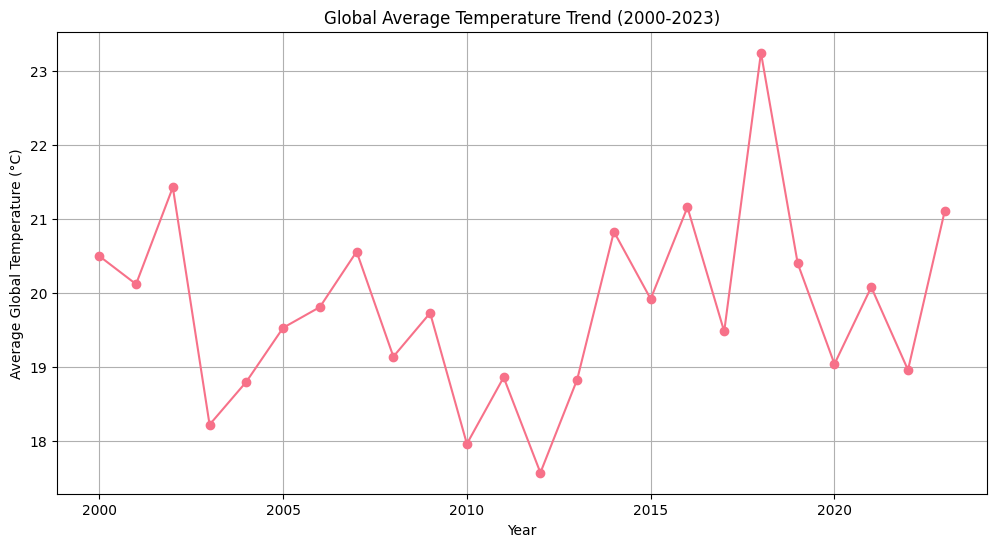

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_temp.index, yearly_temp['mean'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Global Temperature (°C)')
plt.title('Global Average Temperature Trend (2000-2023)')
plt.grid(True)
plt.show()

## Visualising co2 emissions trends

plot to show the trend of CO2 emissions per capita over time.


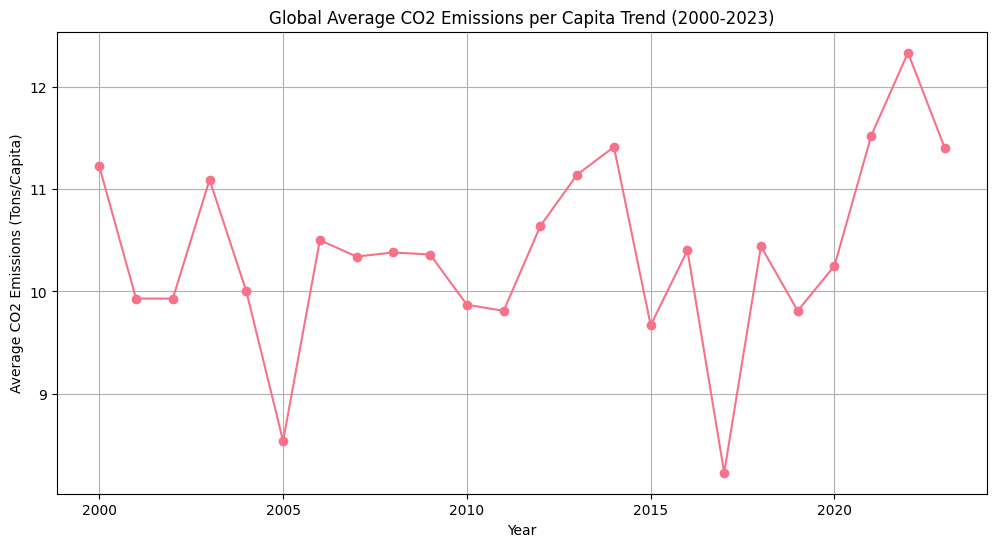

In [94]:
yearly_co2 = df.groupby('Year')['CO2 Emissions (Tons/Capita)'].mean().round(2)

plt.figure(figsize=(12, 6))
plt.plot(yearly_co2.index, yearly_co2.values, marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average CO2 Emissions (Tons/Capita)')
plt.title('Global Average CO2 Emissions per Capita Trend (2000-2023)')
plt.grid(True)
plt.show()

## Visualising renewable energy adoption

 visualization to illustrate the global trend of renewable energy adoption.


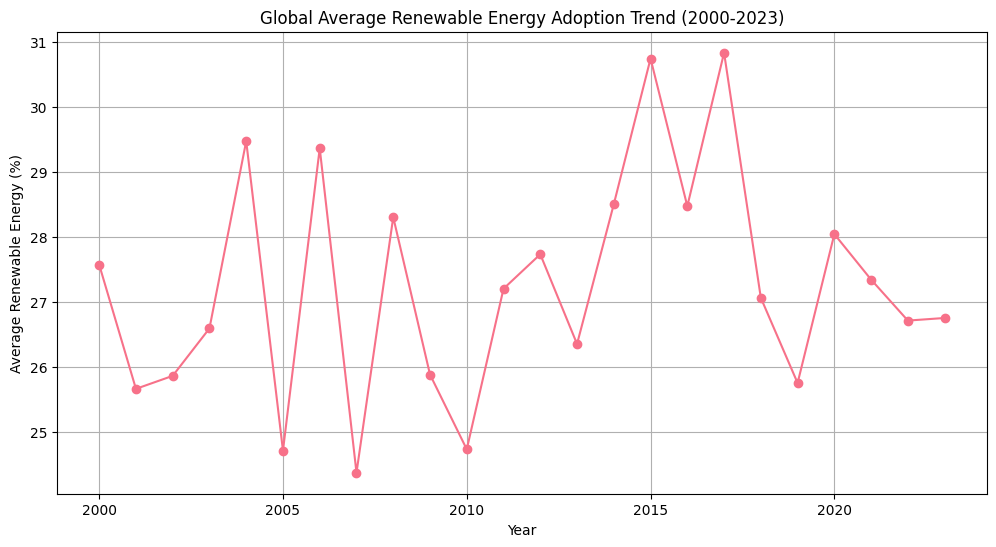

In [95]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_renewable.index, yearly_renewable['mean'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Renewable Energy (%)')
plt.title('Global Average Renewable Energy Adoption Trend (2000-2023)')
plt.grid(True)
plt.show()

## Visualising extreme weather events

 trend of extreme weather events over the years.


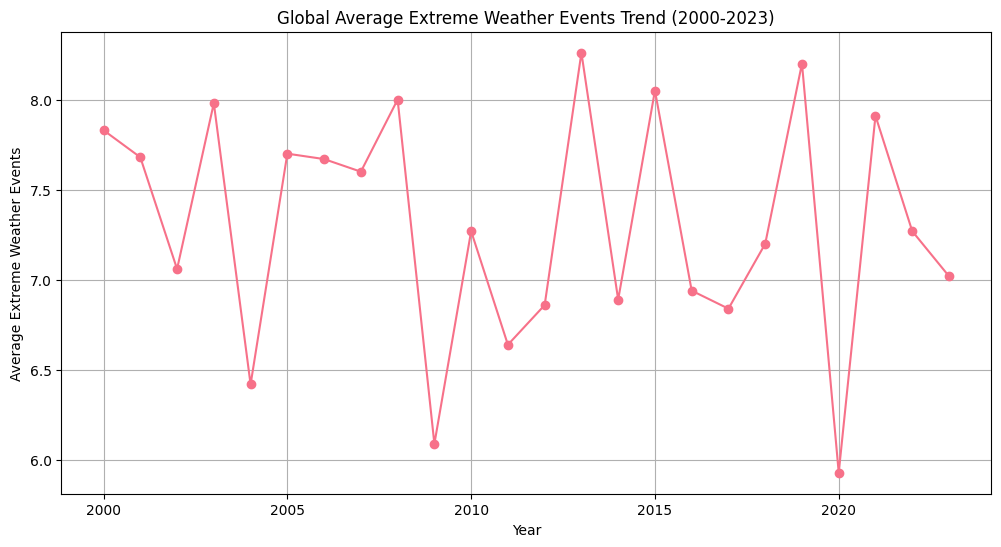

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_weather.index, yearly_weather['mean'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Extreme Weather Events')
plt.title('Global Average Extreme Weather Events Trend (2000-2023)')
plt.grid(True)
plt.show()

## Visualising sea level rise
plot to show how sea level has changed over time.


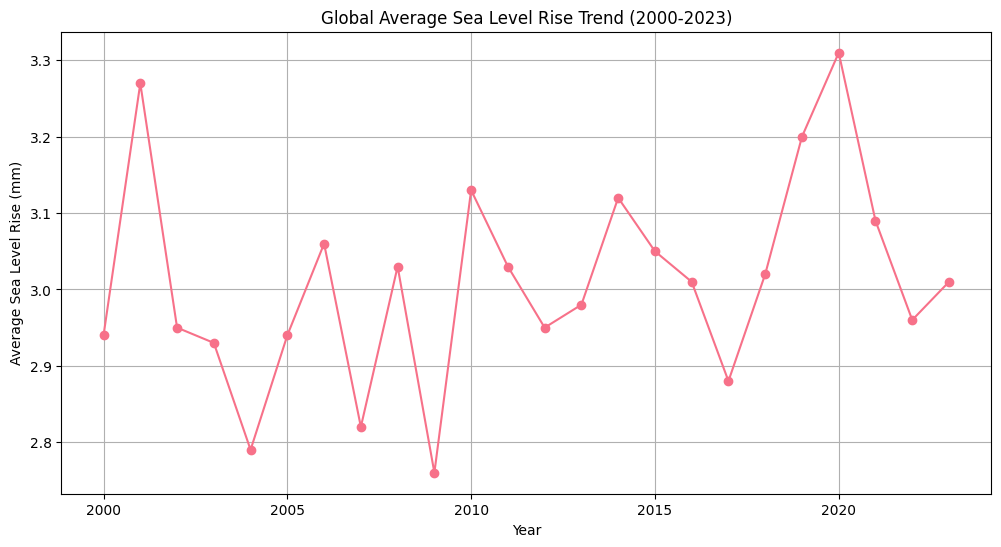

In [97]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_sea_level.index, yearly_sea_level['mean'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Sea Level Rise (mm)')
plt.title('Global Average Sea Level Rise Trend (2000-2023)')
plt.grid(True)
plt.show()

## Visualising forest area trends

plot to visualize the trend of forest area percentage globally.


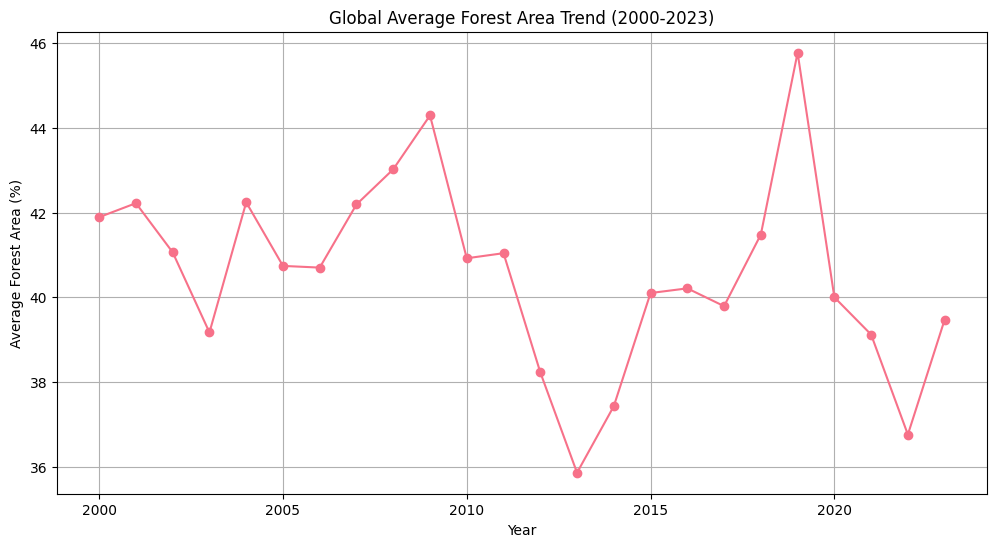

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_forest.index, yearly_forest['mean'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Forest Area (%)')
plt.title('Global Average Forest Area Trend (2000-2023)')
plt.grid(True)
plt.show()

## Visualising rainfall patterns

a plot to show the global rainfall patterns over time.


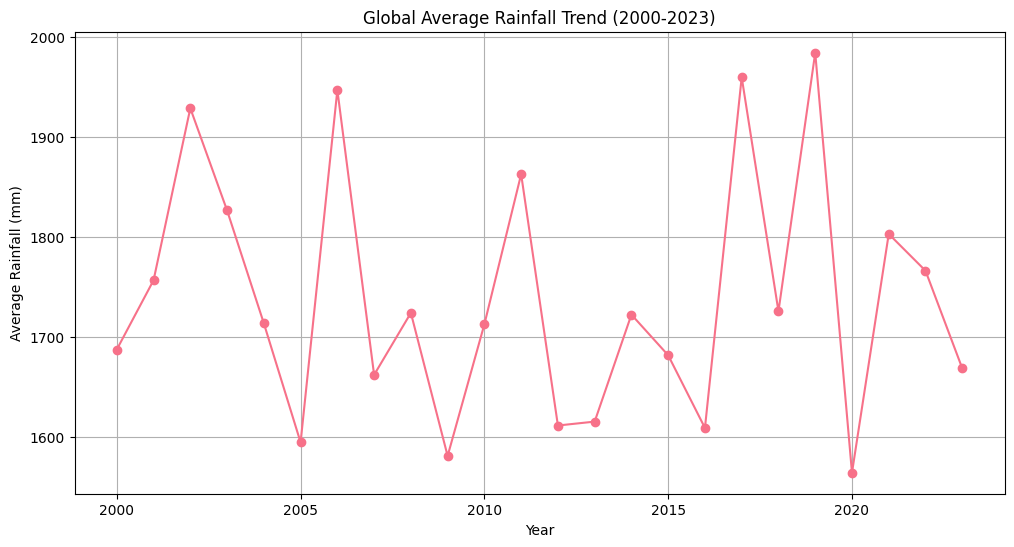

In [99]:
plt.figure(figsize=(12, 6))
plt.plot(yearly_rainfall.index, yearly_rainfall['mean'], marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.title('Global Average Rainfall Trend (2000-2023)')
plt.grid(True)
plt.show()

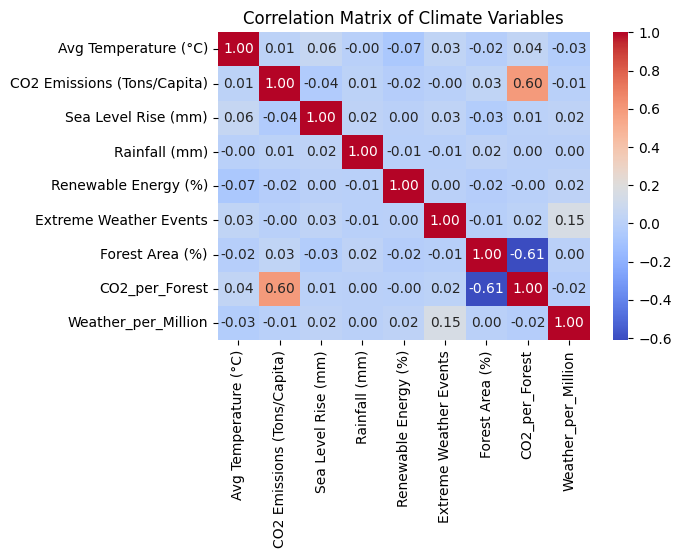

In [100]:
# Select only numerical columns for correlation analysis, excluding 'Year' and 'Population'
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_correlate = [col for col in numerical_cols if col not in ['Year', 'Population']]
correlation_matrix = df[cols_to_correlate].corr()

# Create a heatmap
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Climate Variables')
plt.show()

### In summary, the correlation matrix decisively indicates that there is no strong evidence of simple linear dependence among these specific climate variables in the provided dataset.

## Summary:

### Data Analysis Key Findings

* **Global Temperature:** The global average temperature has shown a slight increasing trend between 2000 and 2023, although the trend is not statistically significant (p > 0.05). Brazil and South Africa had the highest average temperatures, while the UK had the lowest.
* **CO2 Emissions:** Global average CO2 emissions per capita show fluctuations but no statistically significant trend over the period. The UK, Indonesia, and France had the highest average emissions, while Australia and Russia had the lowest.
* **Renewable Energy:** Global average renewable energy adoption shows a positive trend, though not statistically significant. China, Brazil, and France lead in average renewable energy adoption, while Argentina shows the fastest growth in adoption.
* **Extreme Weather Events:** There is no statistically significant trend in the global average number of extreme weather events. France, Japan, and the UK experienced the highest average number of extreme weather events.
* **Sea Level Rise:** Global average sea level rise shows a slight increasing trend, but it is not statistically significant. Russia and France show the highest average sea level rise, while Mexico and Indonesia show the lowest.
* **Forest Area:** Global average forest area shows a decreasing trend, although it is not statistically significant. China and Mexico have the highest average forest cover, while Japan and Russia have the lowest. Several countries, including France, Indonesia, and Russia, are experiencing significant deforestation.
* **Rainfall:** Global average rainfall shows a slight decreasing trend, but it is not statistically significant. Canada and China have the highest average rainfall, while the UK and India have the lowest. Several countries, including China, Germany, and Japan, show decreasing rainfall trends.
* **Country Comparisons:** Visualizations highlight significant variations in climate metrics across countries, indicating that climate change impacts and progress in mitigation/adaptation efforts are not uniform.
* **Correlations:** The correlation matrix reveals weak relationships between most climate variables. Population shows weak positive correlations with temperature, CO2 emissions, and extreme weather events, and a weak negative correlation with forest cover.

### Insights and Policy Implications

* The lack of statistically significant global trends for many variables suggests that while changes are occurring, they may be localized or influenced by factors not captured in this dataset, or the 24-year period is insufficient to detect long-term trends with high confidence. Further analysis with longer time series data and additional variables could provide deeper insights.
* The country-wise comparisons and integrated risk assessment highlight that climate risks and vulnerabilities are unevenly distributed. This underscores the need for targeted and differentiated policy interventions rather than a one-size-fits-all approach.
* Countries with high emissions (UK, Indonesia, France) and those experiencing significant deforestation (France, Indonesia, Russia) should be prioritized for immediate mitigation efforts.
* Countries with high climate risk scores (Japan, France, UK) require urgent focus on adaptation and building climate resilience.
* There are clear opportunities for accelerating renewable energy adoption, particularly in countries with positive growth trends and potential for increased capacity (e.g., Argentina, Germany). Similarly, reforestation efforts should be concentrated in countries with low forest cover and high potential for increase (e.g., Japan, USA).
* The weak correlations between many variables suggest that climate change is a complex phenomenon driven by multiple interacting factors. A holistic policy framework that addresses various environmental, social, and economic dimensions is crucial for effective climate action.
* Future research could explore the impact of specific policies on these climate metrics and analyze the socio-economic factors influencing climate vulnerability and resilience in different countries.